# MileApp Data Task

This notebook contains the solution for the MileApp technical test, covering **Machine Learning Modelling** and **Data Visualization** for insight generation.

### 01 Python Packages

In [1]:
### Packages for Data Processing
import pandas as pd
import numpy as np
import json

### Packages for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium

### 02 Convert JSON File to Dataframe

In [2]:
# Read from a JSON file function
def read_json_file(file_path):
    """Read JSON from file and convert to DataFrame"""
    with open(file_path, 'r') as file:
        data = json.load(file)
    return pd.json_normalize(data)

In [3]:
# Dataframe from JSON filepath
df = read_json_file('data-sample.json')

### 03 Exploratory Data Analysis

This part of the notebook will include analyses and visualizations of the converted *data-sample.json* file

In [6]:
# Information of the dataframe
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8334 entries, 0 to 8333
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   taskCreatedTime                8334 non-null   object 
 1   taskAssignedTo                 8333 non-null   object 
 2   taskCompletedTime              7566 non-null   object 
 3   taskStatus                     8334 non-null   object 
 4   flow                           8334 non-null   object 
 5   taskId                         8334 non-null   object 
 6   taskLocationDone.lon           7566 non-null   float64
 7   taskLocationDone.lat           7566 non-null   float64
 8   cod.amount                     2358 non-null   float64
 9   cod.received                   2358 non-null   object 
 10  UserVar.branch_dest            8334 non-null   object 
 11  UserVar.taskStatusLabel        7572 non-null   object 
 12  UserVar.receiver_city          8282 non-null   o

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus
0,2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,COLF01
1,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,COLF01
2,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01
3,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01
4,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01


In [39]:
### Check for Null Values
df.isnull().sum()

taskCreatedTime                     0
taskAssignedTo                      1
taskCompletedTime                 768
taskStatus                          0
flow                                0
taskId                              0
taskLocationDone.lon              768
taskLocationDone.lat              768
cod.amount                       5976
cod.received                     5976
UserVar.branch_dest                 0
UserVar.taskStatusLabel           762
UserVar.receiver_city              52
UserVar.taskDetailStatusLabel     762
UserVar.taskDetailStatus          762
UserVar.weight                      0
UserVar.branch_origin             293
UserVar.taskStatus                762
dtype: int64

data-sample:
* Most of cod.amount and cod.received data is unavailable (Null values)
* For cod.received, *null values* will be dropped because of Boolean value properties for modelling purposes ("True", "False")

**Check Location of Package Deliveries**

Number of Unique Delivery Locations:  1830 

Top 10 Delivery Locations by Number of Deliveries: 


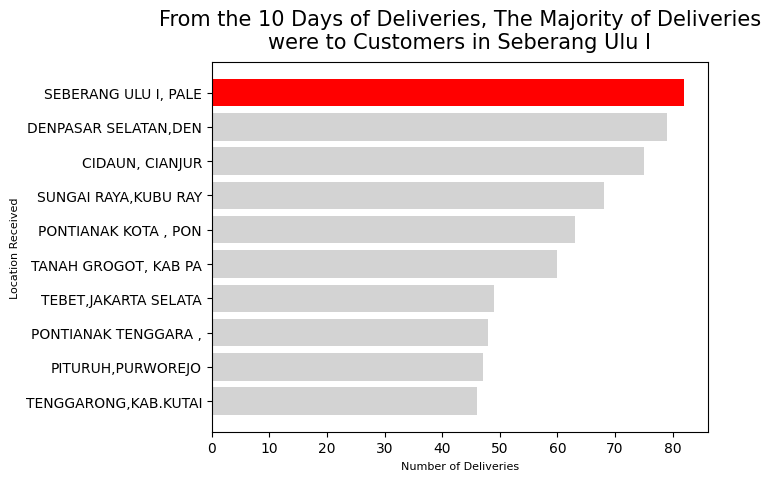

In [4]:
print("Number of Unique Delivery Locations: ",df['UserVar.receiver_city'].nunique(),"\n")
print("Top 10 Delivery Locations by Number of Deliveries: ")
top10_receiver = df.groupby('UserVar.receiver_city')['taskCreatedTime'].agg(func=np.size).sort_values(ascending=False).reset_index().head(10)
top10_receiver = top10_receiver.rename(columns={'taskCreatedTime':'number_of_tasks'})
# top10_receiver = top10_receiver.sort_values(by='number_of_tasks', ascending=False)

# Visualize the Top 10 Trend
colormap = ['red' if val == max(top10_receiver['number_of_tasks']) else 'lightgrey' for val in top10_receiver['number_of_tasks']]

plt.barh(
    'UserVar.receiver_city',
    'number_of_tasks',
    data = top10_receiver, color = colormap
)

plt.xlabel('Number of Deliveries', size=8)
plt.ylabel('Location Received', size=8)
plt.gca().invert_yaxis()
plt.title('From the 10 Days of Deliveries, The Majority of Deliveries\nwere to Customers in Seberang Ulu I', loc='center', pad=10, size=15)
# plt.tight_layout()

plt.show()

**Delivery Volume Daily Trend**
* The purpose is to view trends related to delivery volume within the 10 days of the data scope
* Drop *cod.amount* and *cod.received* due to a great number of null values

In [5]:
# Dataframe for delivery trend
df_delivery = df.copy().drop(['cod.amount', 'cod.received'], axis=1)
df_delivery = df_delivery.dropna()

df_delivery['taskCreatedTime'] = pd.to_datetime(df_delivery['taskCreatedTime'])
df_delivery['taskCompletedTime'] = pd.to_datetime(df_delivery['taskCompletedTime'])
df_delivery['UserVar.weight'] = df_delivery['UserVar.weight'].astype(float)

# df_delivery.info()

C:\Users\HP Pavilion Gaming\AppData\Local\Temp\ipykernel_65980\804388708.py:6: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise a warning unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_delivery['taskCompletedTime'] = pd.to_datetime(df_delivery['taskCompletedTime'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   taskCreatedTime  3342 non-null   datetime64[ns]
 1   success_count    3342 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 52.3 KB


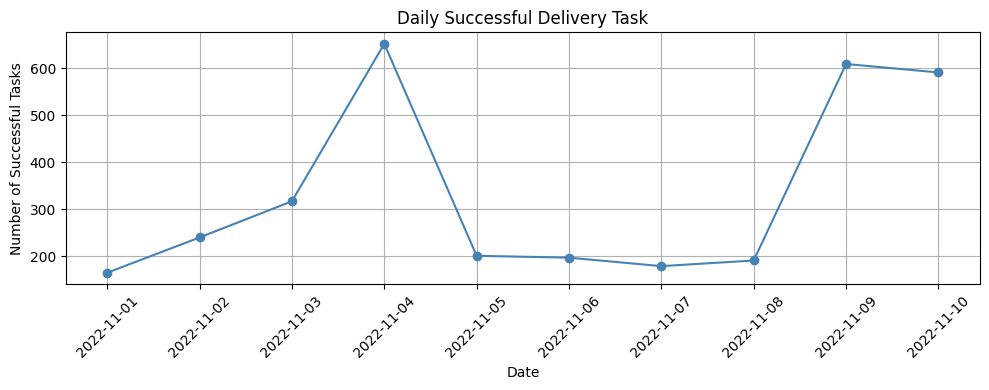

In [6]:
# Group the number of successful tasks for each Task Created Time Date
success_count = df_delivery[df_delivery['UserVar.taskStatusLabel'] == "Success"].groupby('taskCreatedTime').agg(success_count=('UserVar.taskStatusLabel', 'count')).reset_index()
success_count['taskCreatedTime'] = success_count['taskCreatedTime'].dt.date
success_count['taskCreatedTime'] = pd.to_datetime(success_count['taskCreatedTime'])

success_count.info()

success_trend = success_count.groupby('taskCreatedTime')['success_count'].agg(func=np.size).reset_index()

# Plot
plt.figure(figsize=(10, 4))
plt.plot(success_trend['taskCreatedTime'], success_trend['success_count'], marker='o', linestyle='-', color='steelblue')

# Labels and title
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Number of Successful Tasks')
plt.title('Daily Successful Delivery Task')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

* The graph indicates spikes in the number of successful deliveries on the dates 2022-11-04 and 2022-11-09
* Further exploration can be implemented for *Delivery Location*, *Item weight* (UserVar.weight), *etc*.

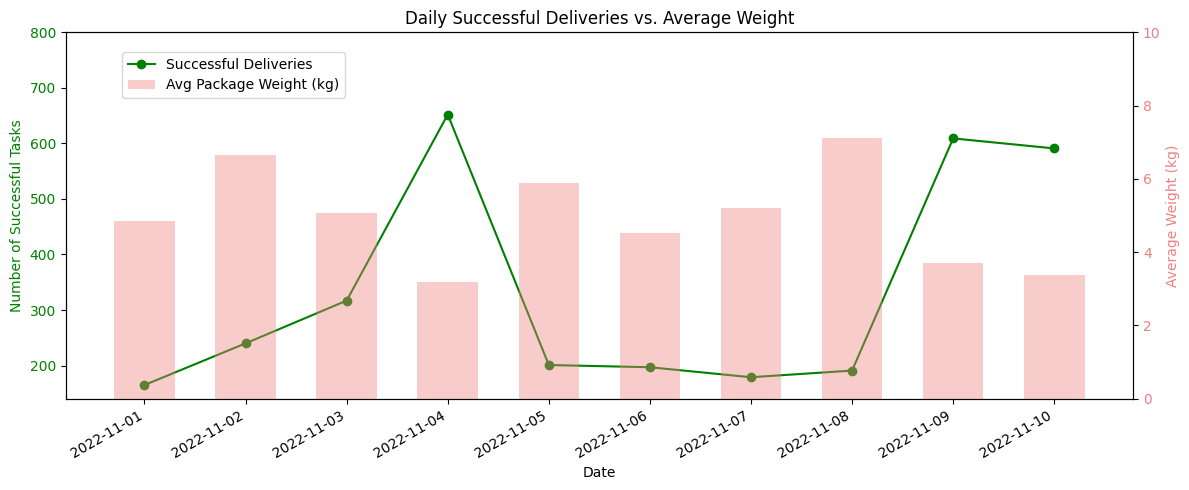

In [7]:
# Group the number of successful tasks for each Task Created Time Date with each date's average package weight
success_count = df_delivery[df_delivery['UserVar.taskStatusLabel'] ==
                             "Success"].groupby(['taskCreatedTime']).agg(success_count=('UserVar.taskStatusLabel', 'count'),
                                                                         total_weight=('UserVar.weight','sum')).reset_index()
success_count['taskCreatedTime'] = success_count['taskCreatedTime'].dt.date
success_count['taskCreatedTime'] = pd.to_datetime(success_count['taskCreatedTime'])


success_weight = success_count.groupby('taskCreatedTime').agg({
    'success_count': 'size',
    'total_weight': 'mean'
}).reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(12, 5))

# Line chart: Number of successful deliveries
ax1.plot(success_weight['taskCreatedTime'], success_weight['success_count'], color='green', marker='o', label='Successful Deliveries')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Successful Tasks', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_ylim(top=800)

# Bar chart: Average weight on a second Y-axis
ax2 = ax1.twinx()
ax2.bar(success_weight['taskCreatedTime'], success_weight['total_weight'], color='lightcoral', alpha=0.4, label='Avg Package Weight (kg)', width=0.6)
ax2.set_ylabel('Average Weight (kg)', color='lightcoral')
ax2.tick_params(axis='y', labelcolor='lightcoral')
ax2.set_ylim(top=10)

# Titles and grid
plt.title('Daily Successful Deliveries vs. Average Weight')
fig.autofmt_xdate()

# Legend
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.tight_layout()
plt.show()

Findings:
* From the graph, there is a negative trend between Delivery Success & Package Weight
* The spike of successful deliveries on the date 2022-11-04 also shows a major decline in average weight of packages delivered
* The same trend appeared again on dates 2022-11-09, 2022-11-10
* For dates with high average weight of packages delivered, delivery success rate is significantly smaller.

Insight:
* Lighter packages delivered resulted in more efficient delivery processes
* Heavy packages may slow down delivery process (*complex handling*, *vehicle load capacity limits*)

**Visualizing relationship of Delivery Time vs Package Weight**

In [8]:
# Convert Task Time to create DeliveryDuration column
df_delivery['taskCompletedTime'] = pd.to_datetime(df_delivery['taskCompletedTime'], utc=True)
df_delivery['taskCreatedTime'] = pd.to_datetime(df_delivery['taskCreatedTime'], utc=True)

# Calculate duration
df_delivery['deliveryDuration'] = df_delivery['taskCompletedTime'] - df_delivery['taskCreatedTime']

# Convert from UTC to UTC+07:00 (Asia/Jakarta)
df_delivery['taskCreatedTime'] = df_delivery['taskCreatedTime'].dt.tz_convert('Asia/Jakarta')
df_delivery['taskCompletedTime'] = df_delivery['taskCompletedTime'].dt.tz_convert('Asia/Jakarta')

# Convert deliveryDuration to minutes
df_delivery['deliveryDuration_minutes'] = df_delivery['deliveryDuration'].dt.total_seconds() / 60
df_delivery['deliveryDuration_minutes'] = df_delivery['deliveryDuration_minutes'].astype(int)


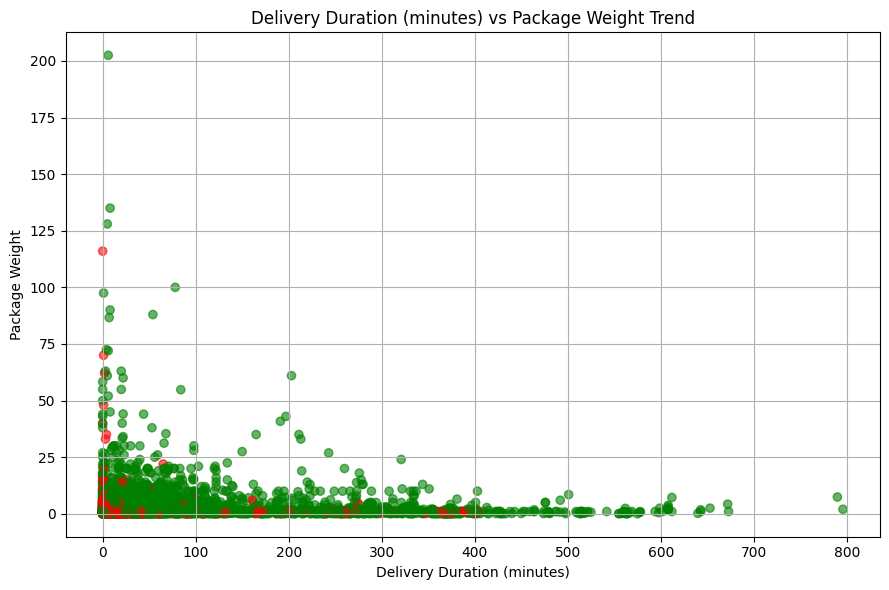

In [9]:
# Map colors to categories
color_map = {'Success': 'green', 'Failed': 'red'}
colors = df_delivery['UserVar.taskStatusLabel'].map(color_map)

# Scatter plot of delivery duration (minutes) over time
plt.figure(figsize=(9, 6))
plt.scatter(df_delivery['deliveryDuration_minutes'], 
            df_delivery['UserVar.weight'], 
            alpha=0.6, 
            c=colors)

plt.title('Delivery Duration (minutes) vs Package Weight Trend')
plt.ylabel('Package Weight')
plt.xlabel('Delivery Duration (minutes)')
# plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

* Overlapping data points for *Success* and *Fail* StatusLabel does not exhibit a segmentation of delivery duration between successful deliveries and unsuccessful 

**Geospatial Analysis of Delivery Locations**

In [43]:
# Map Longitude-Latitude

# import plotly.io as pio
# pio.renderers.default = 'vscode'  # or 'notebook_connected' for better interactivity

fig = px.scatter_mapbox(
    df_delivery,
    lat="taskLocationDone.lat",
    lon="taskLocationDone.lon",
    color="UserVar.taskStatusLabel",  # 'Success' or 'Fail'
    size="UserVar.weight",  # Optional, for impact of weight
    hover_name="UserVar.receiver_city",
    hover_data=["taskId", "deliveryDuration_minutes", "UserVar.branch_origin"],
    zoom=4,
    center={"lat": -7.5, "lon": 110.0},
    height=600,
    # mapbox_style="carto-positron",
    mapbox_style="open-street-map", # or "open-street-map"
    title="Successful vs Unsuccessful Delivery Task Locations"
)
fig.show()

C:\Users\HP Pavilion Gaming\AppData\Local\Temp\ipykernel_65980\3847881454.py:6: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



Findings:
* Most deliveries within the last 10 days were successful
* The majority of delivery locations were concentrated within *Java* & *Sumatera* Region
* There were fewer deliveries to the Eastern Regions (*Borneo*, *Sulawesi*, *Papua*, etc)

Insight:
* Deliveries were more focused to Urban Regions
* Deliveries of Heavy Packages to non-urban regions have a tendency to not arrive/fail.

**Courier Performance**

Check *taskStatus* for Deliveries and their task completion time

In [37]:
# Check taskStatus
print("Number of tasks by Status: \n", df.groupby('taskStatus').size())
print("\nMissing Task Completion Time data: \n",df[df['taskStatus'] == "ongoing"]['taskCompletedTime'].isnull().sum())

Number of tasks by Status: 
 taskStatus
done       7572
ongoing     762
dtype: int64

Missing Task Completion Time data: 
 762


In [38]:
# df['taskAssignedTo'].nunique()
df_performance = df[df['taskStatus'] == 'done'].reset_index()
df_performance = df_performance.dropna(subset=['taskCompletedTime'])

# Convert Task Time to create DeliveryDuration column
df_performance['taskCompletedTime'] = pd.to_datetime(df_performance['taskCompletedTime'], utc=True)
df_performance['taskCreatedTime'] = pd.to_datetime(df_performance['taskCreatedTime'], utc=True)

# Calculate duration
df_performance['deliveryDuration'] = df_performance['taskCompletedTime'] - df_performance['taskCreatedTime']

# Convert from UTC to UTC+07:00 (Asia/Jakarta)
df_performance['taskCreatedTime'] = df_performance['taskCreatedTime'].dt.tz_convert('Asia/Jakarta')
df_performance['taskCompletedTime'] = df_performance['taskCompletedTime'].dt.tz_convert('Asia/Jakarta')

# Convert deliveryDuration to minutes
df_performance['deliveryDuration_minutes'] = df_performance['deliveryDuration'].dt.total_seconds() / 60
df_performance['deliveryDuration_minutes'] = df_performance['deliveryDuration_minutes'].astype(int)


C:\Users\HP Pavilion Gaming\AppData\Local\Temp\ipykernel_65980\1471246800.py:2: FutureWarning:

The provided callable <function mean at 0x000002A5EFF16160> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

C:\Users\HP Pavilion Gaming\AppData\Local\Temp\ipykernel_65980\1471246800.py:6: FutureWarning:

The provided callable <function mean at 0x000002A5EFF16160> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



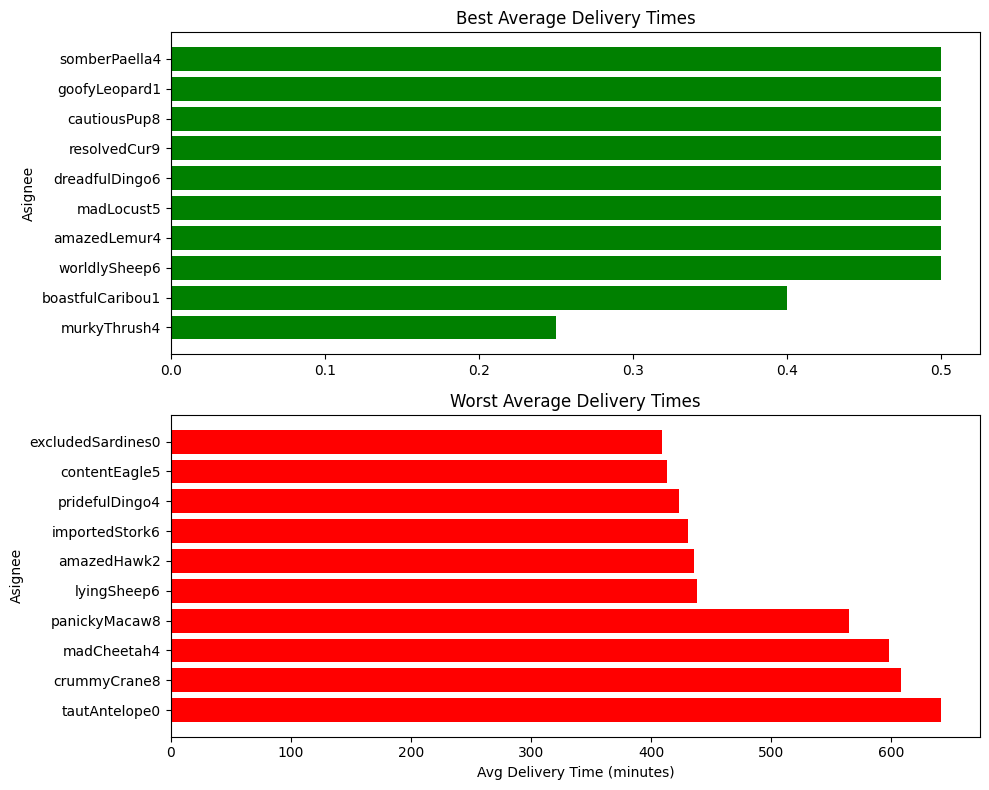

In [ ]:
# Top 10 Best & Worst
top10_best = df_performance.groupby('taskAssignedTo')['deliveryDuration_minutes'].agg(func=np.mean).sort_values(ascending=True).reset_index()
top10_best = top10_best[top10_best['deliveryDuration_minutes'] > 0].head(10)
top10_best = top10_best.rename(columns={'deliveryDuration_minutes':'avg_delivery_duration_minutes'})

top10_worst = df_performance.groupby('taskAssignedTo')['deliveryDuration_minutes'].agg(func=np.mean).sort_values(ascending=False).reset_index().head(10)
top10_worst = top10_worst.rename(columns={'deliveryDuration_minutes':'avg_delivery_duration_minutes'})

# Create subplots: 2 rows, 1 column
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=False)

# Success chart
axs[0].barh('taskAssignedTo', 'avg_delivery_duration_minutes', data=top10_best, color='green')
axs[0].set_title('Best Average Delivery Times')
axs[0].set_ylabel('Asignee')

# Fail chart
axs[1].barh('taskAssignedTo', 'avg_delivery_duration_minutes', data=top10_worst, color='red')
axs[1].set_title('Worst Average Delivery Times')
axs[1].set_xlabel('Avg Delivery Time (minutes)')
axs[1].set_ylabel('Asignee')

plt.tight_layout()
plt.show()

Insight:
* From this visual, we can interpret the best & worst performing task Asignees
* Best: Asignee with the fastest average delivery time for all deliveries within 10 Days
* Worst: Asignee with the slowest average delivery time for all deliveries within 10 Days

### 04 Machine Learning Model

In [ ]:
# Check Dataframe
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8334 entries, 0 to 8333
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   taskCreatedTime                8334 non-null   object 
 1   taskAssignedTo                 8333 non-null   object 
 2   taskCompletedTime              7566 non-null   object 
 3   taskStatus                     8334 non-null   object 
 4   flow                           8334 non-null   object 
 5   taskId                         8334 non-null   object 
 6   taskLocationDone.lon           7566 non-null   float64
 7   taskLocationDone.lat           7566 non-null   float64
 8   cod.amount                     2358 non-null   float64
 9   cod.received                   2358 non-null   object 
 10  UserVar.branch_dest            8334 non-null   object 
 11  UserVar.taskStatusLabel        7572 non-null   object 
 12  UserVar.receiver_city          8282 non-null   o

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus
0,2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,COLF01
1,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,COLF01
2,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01
3,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01
4,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01


**Data Processing**

In [87]:
# Analyze missing data patterns
missing_percent = df.isnull().sum() / len(df) * 100
# print(missing_percent.sort_values(ascending=False))

# Keep columns with <70% missing data (Threshold of missing data percentage)
columns_to_keep = missing_percent[missing_percent < 70].index
df_reduced = df[columns_to_keep].dropna()

# Convert Task Time to create DeliveryDuration column
df_reduced['taskCompletedTime'] = pd.to_datetime(df_reduced['taskCompletedTime'], utc=True)
df_reduced['taskCreatedTime'] = pd.to_datetime(df_reduced['taskCreatedTime'], utc=True)

# Calculate duration
df_reduced['deliveryDuration'] = df_reduced['taskCompletedTime'] - df_reduced['taskCreatedTime']

# Convert from UTC to UTC+07:00 (Asia/Jakarta)
df_reduced['taskCreatedTime'] = df_reduced['taskCreatedTime'].dt.tz_convert('Asia/Jakarta')
df_reduced['taskCompletedTime'] = df_reduced['taskCompletedTime'].dt.tz_convert('Asia/Jakarta')

# Convert deliveryDuration to minutes
df_reduced['deliveryDuration_minutes'] = df_reduced['deliveryDuration'].dt.total_seconds() / 60
df_reduced['deliveryDuration_minutes'] = df_reduced['deliveryDuration_minutes'].astype(int)

* cod.amount & cod.received will not be used due to having the most null entries
* cod.received contains only binary entries (0, 1).

In [66]:
df_reduced.info()
df_reduced.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7244 entries, 0 to 8333
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype                       
---  ------                         --------------  -----                       
 0   taskCreatedTime                7244 non-null   datetime64[ns, Asia/Jakarta]
 1   taskAssignedTo                 7244 non-null   object                      
 2   taskCompletedTime              7244 non-null   datetime64[ns, Asia/Jakarta]
 3   taskStatus                     7244 non-null   object                      
 4   flow                           7244 non-null   object                      
 5   taskId                         7244 non-null   object                      
 6   taskLocationDone.lon           7244 non-null   float64                     
 7   taskLocationDone.lat           7244 non-null   float64                     
 8   UserVar.branch_dest            7244 non-null   object                      
 9   Us

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus,deliveryDuration,deliveryDuration_minutes
0,2022-11-01 20:17:26+07:00,pacifiedLion0,2022-11-01 20:46:30+07:00,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,COLF01,0 days 00:29:04,29
1,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 12:33:48+07:00,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,COLF01,0 days 03:52:41,232
2,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 13:41:57+07:00,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01,0 days 05:00:50,300
3,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 18:18:19+07:00,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01,0 days 09:37:12,577
4,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 10:51:49+07:00,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01,0 days 02:10:42,130


In [88]:
print("Unique UserVar.branch_dest: ",df_reduced['UserVar.branch_dest'].nunique())
print("Unique UserVar.receiver_city: ",df_reduced['UserVar.receiver_city'].nunique())
print("Unique UserVar.taskStatus: ",df_reduced['UserVar.taskStatus'].nunique())
print("Unique UserVar.branch_origin: ",df_reduced['UserVar.taskStatus'].nunique())
print("Unique UserVar.taskDetailStatus: ",df_reduced['UserVar.taskDetailStatus'].nunique())
print("Unique taskAssignedTo: ",df_reduced['taskAssignedTo'].nunique())
print("Unique UserVar.taskStatusLabel: ",df_reduced['UserVar.taskStatusLabel'].nunique())

Unique UserVar.branch_dest:  62
Unique UserVar.receiver_city:  1709
Unique UserVar.taskStatus:  2
Unique UserVar.branch_origin:  2
Unique UserVar.taskDetailStatus:  31
Unique taskAssignedTo:  2657
Unique UserVar.taskStatusLabel:  2


For this Machine Learning model, we will use **UserVar.taskStatusLabel** as the *Target Variable*

In [89]:
# Machine Learning: binary label column
df_reduced['label'] = df_reduced['UserVar.taskStatusLabel'].apply(lambda x: 1 if x == 'Success' else 0)

# Columns that are dropped; Not used in the modeling
df_model = df_reduced.drop(columns=[
    'taskId', 'taskCreatedTime', 'taskCompletedTime',
    'taskLocationDone.lon', 'taskLocationDone.lat',
    'UserVar.taskStatusLabel',
    'taskStatus', 'flow',
    'UserVar.taskStatus',
    'deliveryDuration',
    'deliveryDuration_minutes',
])

In [90]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7244 entries, 0 to 8333
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   taskAssignedTo                 7244 non-null   object
 1   UserVar.branch_dest            7244 non-null   object
 2   UserVar.receiver_city          7244 non-null   object
 3   UserVar.taskDetailStatusLabel  7244 non-null   object
 4   UserVar.taskDetailStatus       7244 non-null   object
 5   UserVar.weight                 7244 non-null   object
 6   UserVar.branch_origin          7244 non-null   object
 7   label                          7244 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 509.3+ KB


**Encode Categorical Features**

In [91]:
categorical_cols = [
    'taskAssignedTo', 'UserVar.branch_dest',
    'UserVar.receiver_city', 'UserVar.taskDetailStatusLabel',
    'UserVar.taskDetailStatus', 'UserVar.branch_origin'
]

df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

In [92]:
# Check new df_model dataset shape:
print("Dataset Shape: ",df_model.shape)
df_model.head()

Dataset Shape:  (7244, 4545)


,UserVar.weight,label,taskAssignedTo_abjectCaribou1,taskAssignedTo_abjectCur0,taskAssignedTo_abjectFerret4,taskAssignedTo_abjectMuesli1,taskAssignedTo_abjectMuesli9,taskAssignedTo_abjectOtter9,taskAssignedTo_abjectPepper4,taskAssignedTo_abjectPlover7,...,UserVar.branch_origin_SUB,UserVar.branch_origin_TGL,UserVar.branch_origin_TGR,UserVar.branch_origin_TJQ,UserVar.branch_origin_TKG,UserVar.branch_origin_TNJ,UserVar.branch_origin_TRK,UserVar.branch_origin_TSM,UserVar.branch_origin_TTE,UserVar.branch_origin_UPG
0,13,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.3,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.625,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Machine Learning Packages**

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

**Train-Test Split**
* The first modelling process, we will split the train-test dataset into a 80-20 ratio
* Target variable: *label*

In [93]:
# Split data
X = df_model.drop(columns=['label'])
y = df_model['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Model 1: *Random Forest***

In [94]:
# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


**Check Feature Importance**

C:\Users\HP Pavilion Gaming\AppData\Local\Temp\ipykernel_65980\352548325.py:4: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



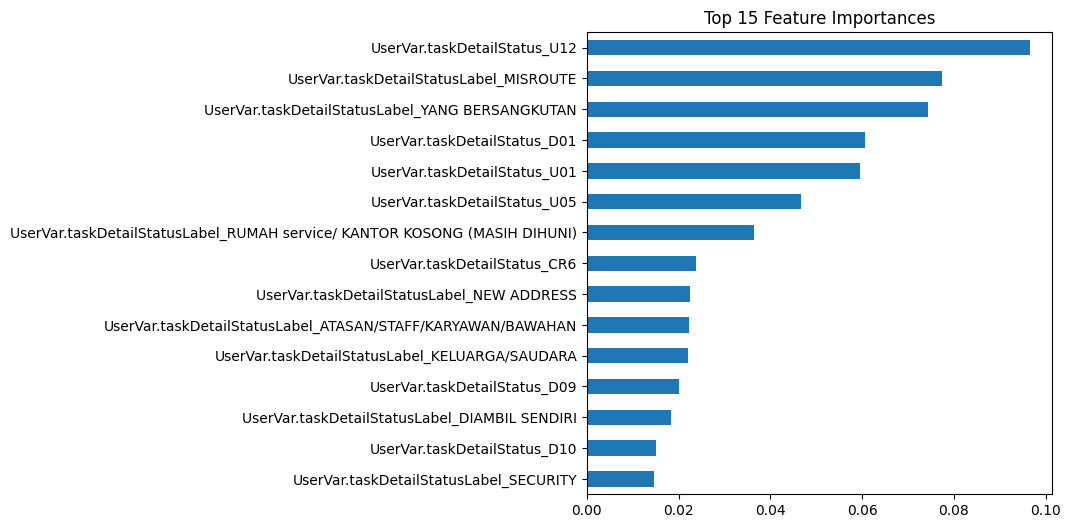

In [95]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(15).sort_values().plot(kind='barh', figsize=(6, 6))
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()

Confusion Matrix:


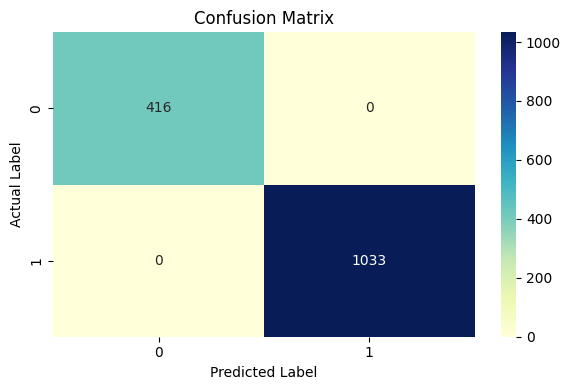


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       416
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      1449
   macro avg       1.00      1.00      1.00      1449
weighted avg       1.00      1.00      1.00      1449



In [96]:
# Predict and evaluate
y_pred = rf.predict(X_test)

print("Confusion Matrix:")
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = rf.classes_

# Plot with seaborn
plt.figure(figsize=(6,4))
sns.heatmap(pd.DataFrame(cm, index=labels, columns=labels), annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

**Model 2: Cross-Validation Models**

In [97]:
from sklearn.model_selection import RandomizedSearchCV

In [98]:
# Example param grid
param_dist = {
    'n_estimators': [100, 200, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

Parameter Selection:
* *n_estimators*: Number of trees in the forest; More trees improve performance, with the increase of computation time
* *max_depth*: Maximum depth of each tree; nodes are expanded, but this can produce overfitting
* *min_samples_split*: Minimum number of samples to split a node
* *min_samples_leaf*: Minimum number of samples required to be at a leaf node
* *bootstrap*: 
    - True (default): Traditional Random Forest behavior.
    - False: Uses the whole dataset to build each tree → more variance, less randomness.

**Model Initialization**

In [99]:
# Initialize the model
rfc = RandomForestClassifier(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    verbose=2,
    n_jobs=-1,
    scoring='accuracy'
)

*Prediction & Evaluation*

In [100]:
# Fit
random_search.fit(X_train, y_train)

# Best model
best_rf = random_search.best_estimator_

# Predict
y_pred = best_rf.predict(X_test)

# Report
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       416
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      1449
   macro avg       1.00      1.00      1.00      1449
weighted avg       1.00      1.00      1.00      1449



Conclusion:
* We can use Machine Learning to predict the Success of a delivery task by modeling task categories (Asignee, Receiver city, task origin/Branch origin)
* Random Forest can produce an accurate prediction without taskCompletedTime variables, which already indicates a successful delivery task